### Business Scenario: A diamond merchant has come to you for help. They want to create an automated system to predict the apt price of a diamond based on its shape/size/color etc.

In [2]:
DiamondData=pd.read_csv('diamonds_data.csv',encoding='latin')

DiamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
DiamondData.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
print('Shape before deleting duplicate values:',DiamondData.shape)

DiamondData=DiamondData.drop_duplicates()

print('Shape after deleting duplicate values:',DiamondData.shape)

Shape before deleting duplicate values: (53940, 10)
Shape after deleting duplicate values: (53794, 10)


## 2)Defining the problem statement

### Create a ML Model which can predict the price of a diamond
        -Target Variable: Price
        -Predictors: color,cut,carat,etc.

## 3)Determining type of ML
Base on the problem statement we can understand that we need to create a Supervised ML Regression Model, as the Target Variable is Continuous.

### 4)Looking at the distribution of Target Variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.

Bell curve is desirable but slightly positive skew or negative skew is also fine

When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.


In [5]:
DiamondData.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


<AxesSubplot:>

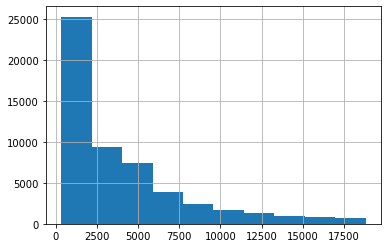

In [6]:
DiamondData['price'].hist()

NOTE: The data distribution of the target variable is satisfactory to proceed further.It is slightly positively skewed. which is acceptable.

### 5)Bastc Data Exploration

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data
    
info() : This provides the summarized information of the data
    
describe() : This provides the descriptive statistical details of the data
    
nunique(): This helps us to identify if a column is categorical or continuous

In [7]:
DiamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
DiamondData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
DiamondData.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79778,NaN,NaN,NaN,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,NaN,NaN,NaN,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000


In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
DiamondData.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [11]:
DiamondData.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


Based on the exploration ablove ,we can note down the observations.

**price:** Continuous. Selected. This is the Target Variable!

**carat:** Continuous. Selected.

**cut:** Categorical. Selected.

**color:** Categorical. Selected.

**clarity:** Categorical. Selected.

**depth:** Continuous. Selected.

**table:** Continuous. Selected.

**x:** Continuous. Selected.

**y:** Continuous. Selected.

**z:** Continuous. Selected.


### Visual Exploratory Data Analysis

Categorical variables: Bar plot
    
Continuous variables: Histogram

**Categorical  Predictors: 'cut','color','clarity'**

In [12]:
def PlotBarCharts(inpData,colsToPlot):
    fig, subPlot=plt.subplots(nrows=1,ncols=len(colsToPlot),figsize=(20,5))
    fig.suptitle('Bar Charts Of:'+str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot,range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

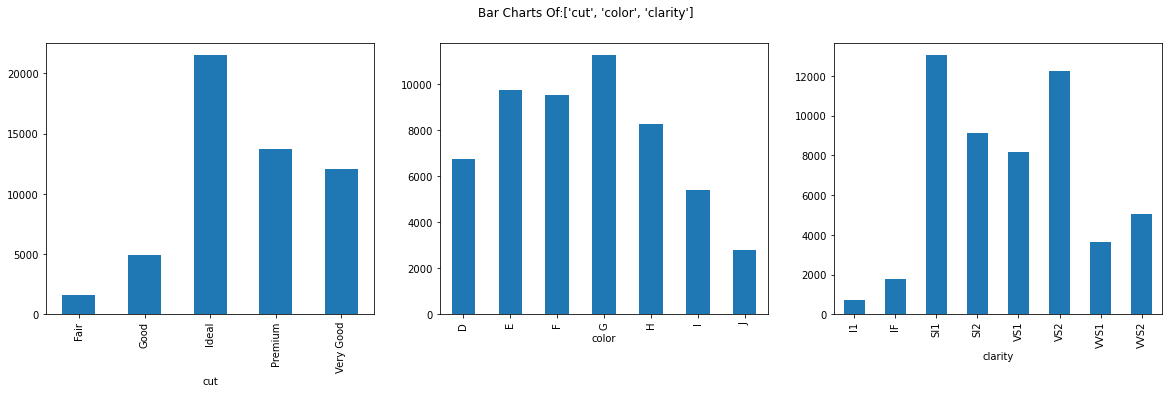

In [13]:
PlotBarCharts(DiamondData,['cut','color','clarity'])

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

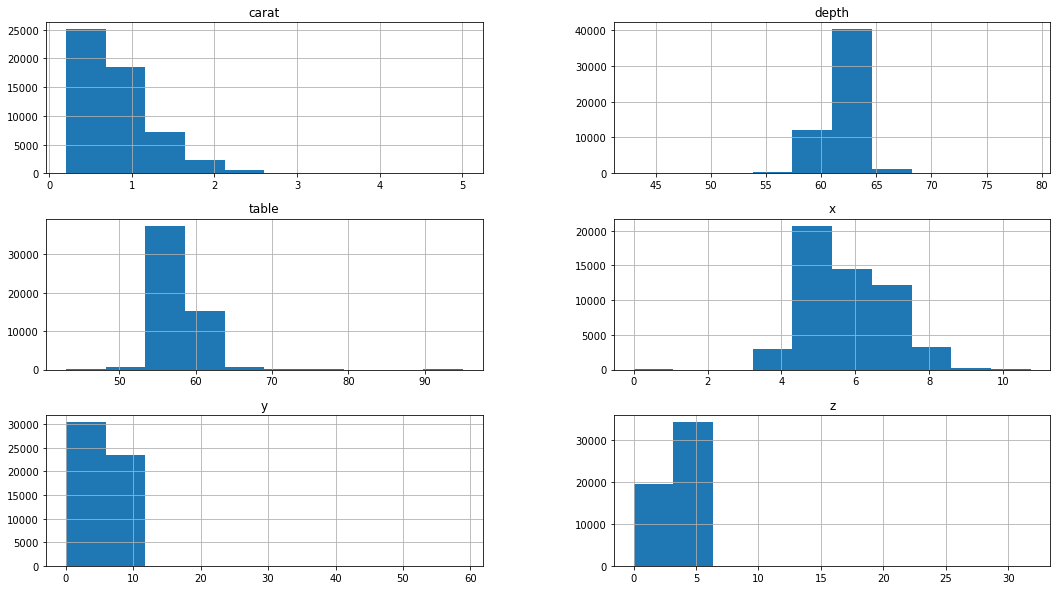

In [14]:
DiamondData.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

Selected Continuous Variables:

carat : Selected. The distribution is good.
table: Selected. The distribution is good.
depth: Selected. The distribution is good.
x: Selected. Outliers seen near 0, need to treat them.
y: Selected. Outliers seen beyond 20, need to treat them.
z: Selected. Outliers seen beyond 10, need to treat them.

### Outlier Treatment

In [15]:
#Replacing outliers for'x'
DiamondData['x'][DiamondData['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

In [16]:
DiamondData['x'][DiamondData['x']<3.73] = 3.73

In [17]:
# Finding nearest values to 20 mark
DiamondData['y'][DiamondData['y']<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
25999     9.94
26444     9.94
         ...  
27429     0.00
15951     0.00
24520     0.00
49556     0.00
11963     0.00
Name: y, Length: 53792, dtype: float64

In [18]:
DiamondData['y'][DiamondData['y']>20] = 10.54

In [19]:
DiamondData['z'][DiamondData['z']<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
27429    0.00
27112    0.00
15951    0.00
4791     0.00
27503    0.00
Name: z, Length: 53793, dtype: float64

In [20]:
DiamondData['z'][DiamondData['z']>8]=6.98

## Visualizing distribution after outlier treatment

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

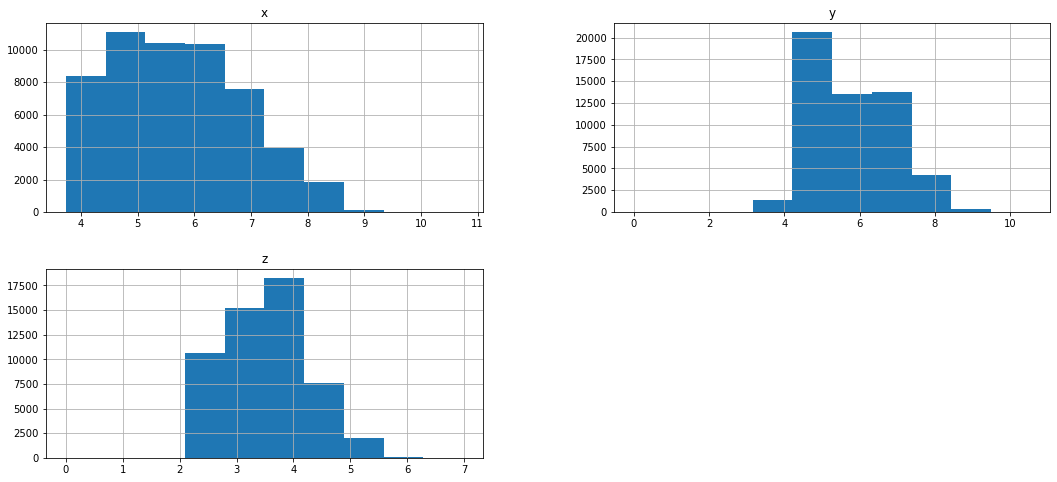

In [21]:
DiamondData.hist(['x','y','z'],figsize=(18,8))

Outliers seen on the left hand side near zero! Need to treat them as well.

In [22]:
DiamondData['y'][DiamondData['y']>2].sort_values(ascending=True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
27415    10.54
49189    10.54
24067    10.54
Name: y, Length: 53788, dtype: float64

In [23]:
DiamondData['y'][DiamondData['y']<2]=3.68

<ipython-input-23-82af8e6fc690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DiamondData['y'][DiamondData['y']<2]=3.68


In [24]:
DiamondData['z'][DiamondData['z']>2].sort_values(ascending=True)

39246    2.06
31592    2.24
47138    2.25
31591    2.26
14       2.27
         ... 
27130    6.43
27630    6.72
24067    6.98
27415    6.98
48410    6.98
Name: z, Length: 53772, dtype: float64

In [25]:
DiamondData['z'][DiamondData['z']<2] =2.06

<ipython-input-25-a192dd9bee2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DiamondData['z'][DiamondData['z']<2] =2.06


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

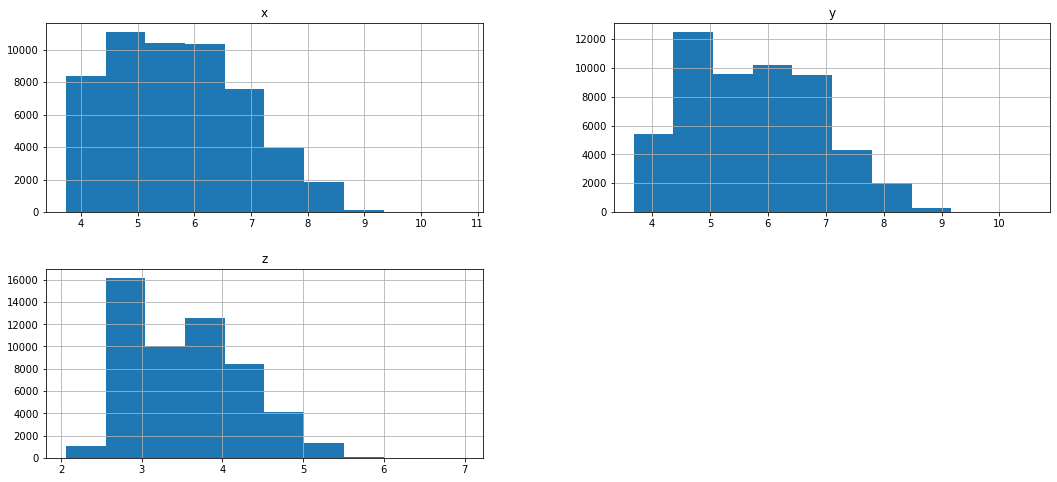

In [26]:
DiamondData.hist(['x','y','z'],figsize=(18,8))

## Missing Value Treatment

In [27]:
DiamondData.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Feature Selection

## Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

#### In this case study the Target variable is Continuous, hence below two scenarios will be present

**Continuous Target Variable Vs Continuous Predictor**

**Continuous Target Variable Vs Categorical Predictor**

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When Target variable is continuous and the predictor value is also continuous, we will be using scatter plot

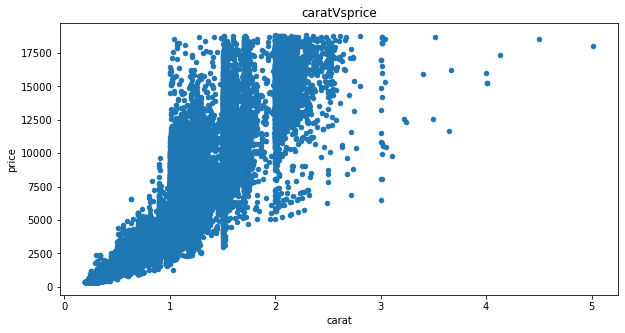

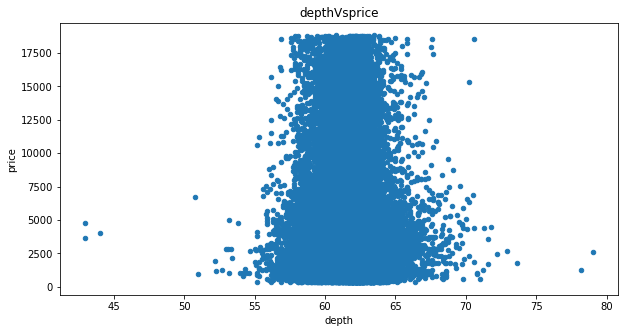

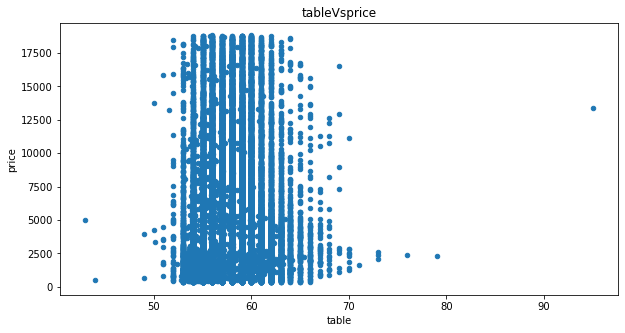

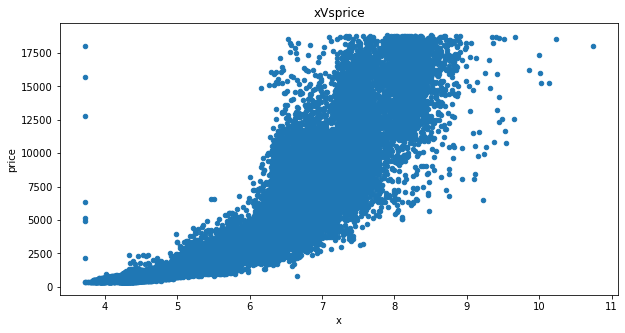

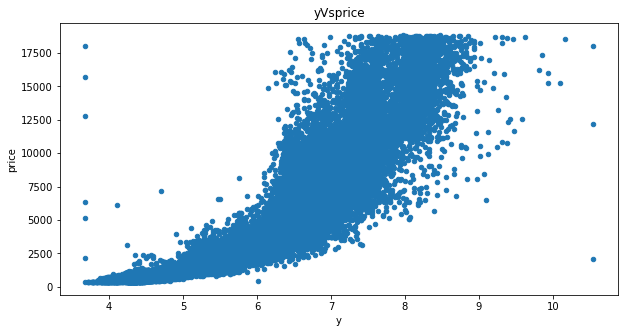

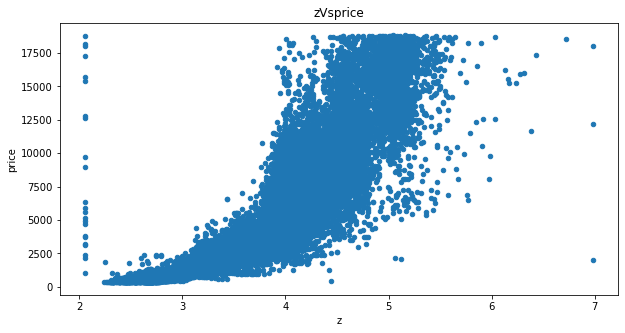

In [29]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

for predictor in ContinuousCols:
    DiamondData.plot.scatter(x=predictor,y='price',
                             figsize=(10,5),title=predictor +"Vs"+'price')

In [30]:
# Creating a data filter to remove outliers from data
DataFilter=(DiamondData['z']>2.06) & (DiamondData['z']<6.5)
DiamondData=DiamondData[DataFilter]

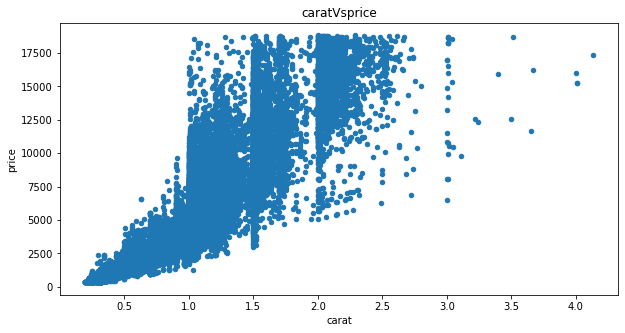

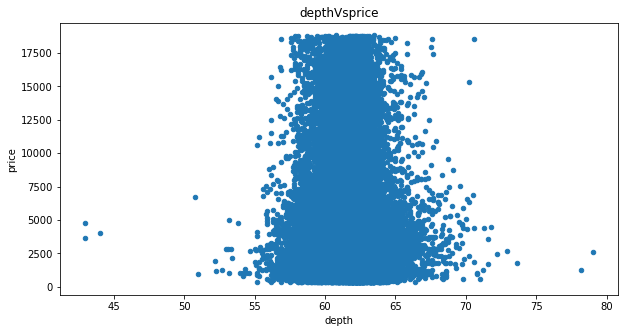

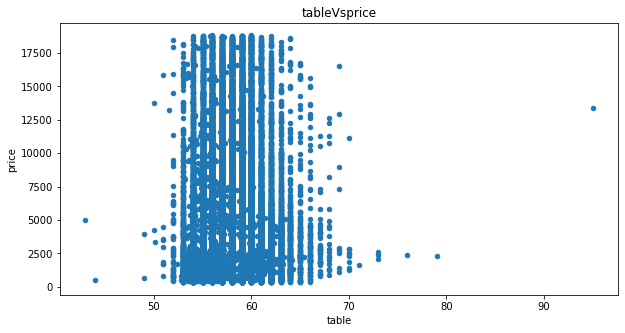

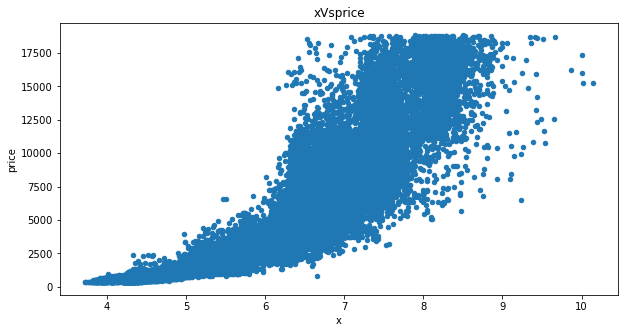

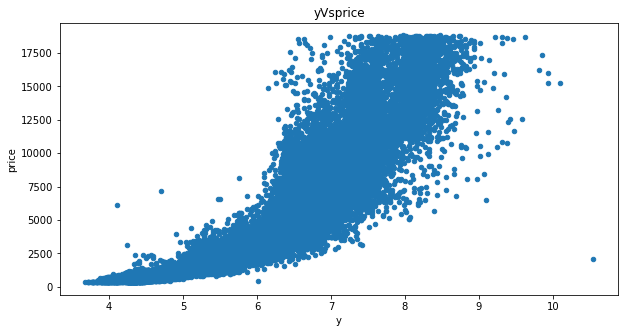

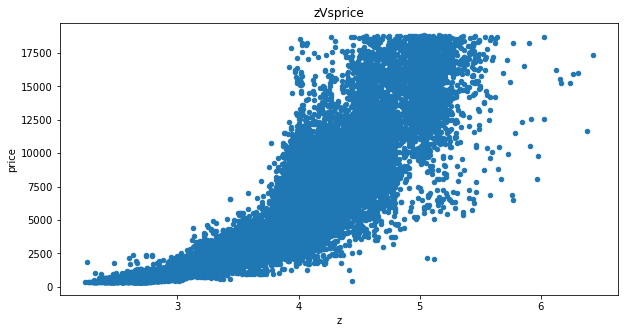

In [31]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

for predictor in ContinuousCols:
    DiamondData.plot.scatter(x=predictor,y='price',
                             figsize=(10,5),title=predictor +"Vs"+'price')

In [33]:
ContinuousCols=['price','carat', 'depth', 'table', 'x','y','z']

CorrelationData=DiamondData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921845,-0.011421,0.126696,0.887063,0.888460,0.882354
carat,0.921845,1.000000,0.027194,0.181277,0.978136,0.977011,0.977179
depth,-0.011421,0.027194,1.000000,-0.297720,-0.025574,-0.028680,0.095882
table,0.126696,0.181277,-0.297720,1.000000,0.195519,0.189201,0.154926
x,0.887063,0.978136,-0.025574,0.195519,1.000000,0.998435,0.991574
y,0.888460,0.977011,-0.028680,0.189201,0.998435,1.000000,0.991271
z,0.882354,0.977179,0.095882,0.154926,0.991574,0.991271,1.000000


In [34]:
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

price    1.000000
carat    0.921845
x        0.887063
y        0.888460
z        0.882354
Name: price, dtype: float64

### Final selected Continuous columns:

'carat', 'x','y','z'

## Relationship exploration: Categorical Vs Continuous -- Box Plots

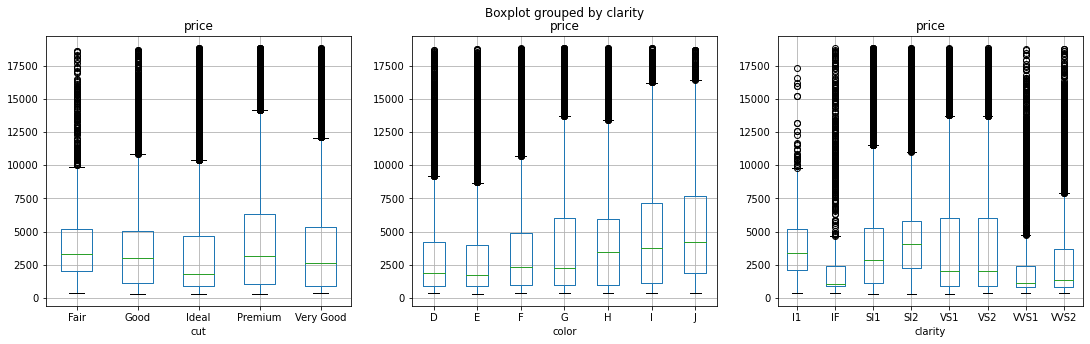

In [35]:
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DiamondData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [36]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [38]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=DiamondData, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 2.41639003272117e-146
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.655076560414e-312


['cut', 'color', 'clarity']

## Selecting final predictors for Machine Learning

In [39]:
SelectedColumns=['carat', 'x','y','z','cut', 'color', 'clarity']

DataForML=DiamondData[SelectedColumns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [40]:
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning

In [41]:
# Looking at unique values of ordinal column
DataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [42]:
DataForML['cut'].replace({'Good':1,
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         },inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [43]:
# Looking at unique values of ordinal column
DataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [44]:
# Replacing the ordinal values
DataForML['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [45]:
# Looking at unique values of ordinal column
DataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [46]:
# Replacing the ordinal values
DataForML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [47]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=DiamondData['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


## Machine Learning: Splitting the data into Training and Testing sample

In [48]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [49]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization/Normalization of data

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37636, 7)
(37636,)
(16131, 7)
(16131,)


In [52]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training Score:{}'.format(model.score(X_train,y_train)))
    
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    
    print('\n')
    
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is :{}'.format(r2_score))
    
    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMS',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    

    sns.distplot(y_test-predictions)
    
    
    if dump==1:
        file=open('D:\Data Analyst courses\Data Analysis Projects\Regression Use Cases\Diamond price prediction/DataForML.pkl','wb')
        pickle.dump(model,file)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score:0.8990644042515243
Predictions are: [4265.09475358 3588.8005758  6015.21881238 ... 5998.48124402 1393.45686552
 2814.95961212]


r2 score is :0.8868494011004433
MAE 843.1368314244288
MSE 1741900.476885986
RMS 29.036818548601858


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


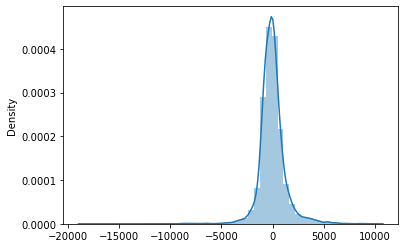

In [54]:
#Passed 0 bec. model dump nhi karna h
predict(LinearRegression(),0)

Training Score:0.9999877441559203
Predictions are: [3218. 4323. 5817. ... 4766. 1053. 2202.]


r2 score is :0.9641520375737093
MAE 367.55902713202323
MSE 551862.5924479436
RMS 19.171828998090486


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


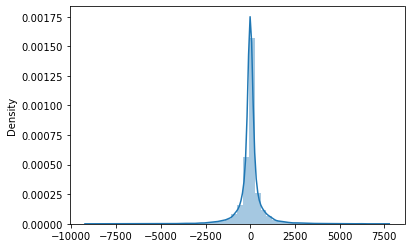

In [55]:
predict(DecisionTreeRegressor(),0)

Training Score:0.9972053287657278
Predictions are: [3378.19 3488.35 5957.84 ... 4999.26  938.38 1957.01]


r2 score is :0.9804547902565052
MAE 274.570275679383
MSE 300889.350159363
RMS 16.570162210412516


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


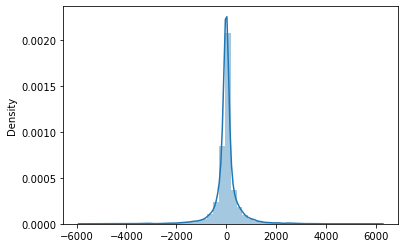

In [56]:
predict(RandomForestRegressor(),0)

Training Score:0.9831307194316357
Predictions are: [3387.2 3466.6 5922.  ... 5041.8 1023.4 1911.4]


r2 score is :0.9729047873336466
MAE 316.6110346537722
MSE 417118.1091736408
RMS 17.793567226775306


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


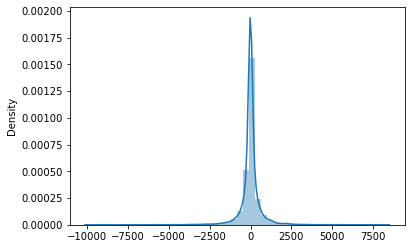

In [57]:
predict(KNeighborsRegressor(),0)

Training Score:0.9162738625825916
Predictions are: [2819.21364594 2875.63626126 6586.37940848 ... 6845.2200267  1180.39778086
 2252.80184747]


r2 score is :0.9107767546605979
MAE 850.5672125736322
MSE 1373550.0750109486
RMS 29.16448546732193


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


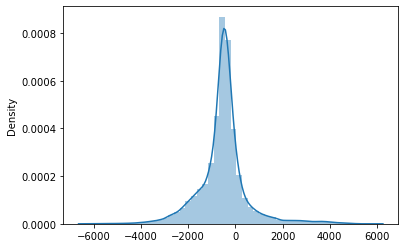

In [58]:
from sklearn.ensemble import AdaBoostRegressor

predict(AdaBoostRegressor(),0)